**ShopEasy Project**

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
shopeasy_data = pd.read_csv('/Users/janstein/Documents/DEV/ML_Project/shopEasy.csv')
shopeasy_data.head()

,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,...,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,C10573,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,...,1,8,1500.0,236.764555,207.007715,0.00,6,New York,Premium,60
1,C16889,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,...,8,0,2000.0,89.741508,173.276205,0.00,6,Los Angeles,Premium,5
2,C12964,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,...,1,1,2500.0,234.271939,117.297542,0.25,12,New York,Student,21
3,C11171,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,...,0,1,5000.0,0.000000,NaN,0.00,12,Chicago,Premium,53
4,C17582,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,...,0,1,1500.0,118.438703,54.138711,0.00,6,New York,Premium,59


**Description of the Dataset**

- **personId**: Unique identifier for each user on the platform

- **accountTotal**: Total amount spent by the user on ShopEasy since their registration

- **frequencyIndex**: Reflects how frequently the user shops, with 1 being very frequent and values less than 1 being less frequent
- **itemCosts**: Total costs of items purchased by the user
- **singleItemCosts**: Costs of items that the user bought in a single purchase without opting for installments
- **multipleItemCosts**: Costs of items that the user decided to buy in installments
- **emergencyFunds**: Amount that the user decided to keep as a backup in their ShopEasy wallet for faster checkout or emergency purchases
- **itemBuyFrequency**: Frequency with which the user makes purchases
- **singleItemBuyFrequency**: How often the user makes single purchases without opting for installments
- **multipleItemBuyFrequency**: How often the user opts for installment-based purchases
- **emergencyUseFrequency**: How frequently the user taps into their emergency funds
- **emergencyCount**: Number of times the user has used their emergency funds
- **itemCount**: Total number of individual items purchased by the user
- **maxSpendLimit**: The maximum amount the user can spend in a single purchase, set by ShopEasy based on user's buying behavior and loyalty
- **monthlyPaid**: Total amount paid by the user every month
- **leastAmountPaid**: The least amount paid by the user in a single transaction
- **paymentCompletionRate**: Percentage of purchases where the user has paid the full amount
- **accountLifespan**: Duration for which the user has been registered on ShopEasy
- **location**: User's city or region
- **accountType**: The type of account held by the user. Regular for most users, Premium for those who have subscribed to ShopEasy premium services, and Student for users who have registered with a student ID
- **webUsage**: A metric (0-100) indicating the frequency with which the user shops on ShopEasy via web browsers. A higher number indicates more frequent web usage

In [17]:
# Display the shape of the dataset (rows, columns)
print("Dataset Shape:", shopeasy_data.shape)

# Display data types of each column
print("Data Types:", shopeasy_data.dtypes)

# Check for missing values
print("Missing Values:", shopeasy_data.isnull().sum())

Dataset Shape: (8950, 21)
Data Types: personId                     object
accountTotal                float64
frequencyIndex              float64
itemCosts                   float64
singleItemCosts             float64
multipleItemCosts           float64
emergencyFunds              float64
itemBuyFrequency            float64
singleItemBuyFrequency      float64
multipleItemBuyFrequency    float64
emergencyUseFrequency       float64
emergencyCount                int64
itemCount                     int64
maxSpendLimit               float64
monthlyPaid                 float64
leastAmountPaid             float64
paymentCompletionRate       float64
accountLifespan               int64
location                     object
accountType                  object
webUsage                      int64
dtype: object
Missing Values: personId                      0
accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCost

### Descriptive Statistics
Descriptive statistics will give us an insight into the central tendency, dispersion, and shape of the dataset's distribution.

In [18]:
# Descriptive statistics for the dataset
shopeasy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
accountTotal,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
frequencyIndex,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
itemCosts,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
singleItemCosts,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
multipleItemCosts,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
emergencyFunds,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
itemBuyFrequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
singleItemBuyFrequency,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
multipleItemBuyFrequency,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
emergencyUseFrequency,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


#### The info() Method
The info() method is used to get a concise summary of the DataFrame. This method is useful for quickly understanding the structure of the dataset, including the following aspects:

- ***Index Range*** Shows the range of the index and the total number of entries in the DataFrame.
- ***Column Names*** Lists all column names in the DataFrame.
- ***Non-Null Counts*** Indicates the number of non-missing (non-null) values for each column. This is crucial for identifying columns with missing data.
- ***Data Types*** Shows the data type of each column (e.g., integer, float, object (string), bool, etc.).
- ***Memory Usage*** Provides information on the memory usage of the DataFrame, which can be important for processing large datasets.

Using info(), you can quickly assess which columns may require type conversion or additional preprocessing due to null values or incorrect data types.

In [19]:
# Using info() to get the dataset summary
shopeasy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personId                  8950 non-null   object 
 1   accountTotal              8950 non-null   float64
 2   frequencyIndex            8950 non-null   float64
 3   itemCosts                 8950 non-null   float64
 4   singleItemCosts           8950 non-null   float64
 5   multipleItemCosts         8950 non-null   float64
 6   emergencyFunds            8950 non-null   float64
 7   itemBuyFrequency          8950 non-null   float64
 8   singleItemBuyFrequency    8950 non-null   float64
 9   multipleItemBuyFrequency  8950 non-null   float64
 10  emergencyUseFrequency     8950 non-null   float64
 11  emergencyCount            8950 non-null   int64  
 12  itemCount                 8950 non-null   int64  
 13  maxSpendLimit             8949 non-null   float64
 14  monthlyP

#### The isnull().sum() Method
The isnull().sum() method is a two-step operation specifically geared towards identifying missing values in the DataFrame:

- ***isnull()*** This part of the method checks each cell in the DataFrame and returns a DataFrame of the same size with boolean values: True if the original cell is null (or NaN), and False otherwise.
- ***sum()*** This part sums up the number of True values (null values) for each column, giving you a total count of missing values in each column.

This method is particularly useful for data cleaning and preprocessing, as handling missing values is a critical step in preparing data for analysis or modeling.

In [20]:
# Using isnull().sum() to count missing values in each column
shopeasy_data.isnull().sum()

personId                      0
accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCosts             0
emergencyFunds                0
itemBuyFrequency              0
singleItemBuyFrequency        0
multipleItemBuyFrequency      0
emergencyUseFrequency         0
emergencyCount                0
itemCount                     0
maxSpendLimit                 1
monthlyPaid                   0
leastAmountPaid             313
paymentCompletionRate         0
accountLifespan               0
location                      0
accountType                   0
webUsage                      0
dtype: int64

## Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words, your data has only one variable. It doesn’t deal with causes or relationships and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

### Analysis of Numerical Features
Let's analyze the numerical features

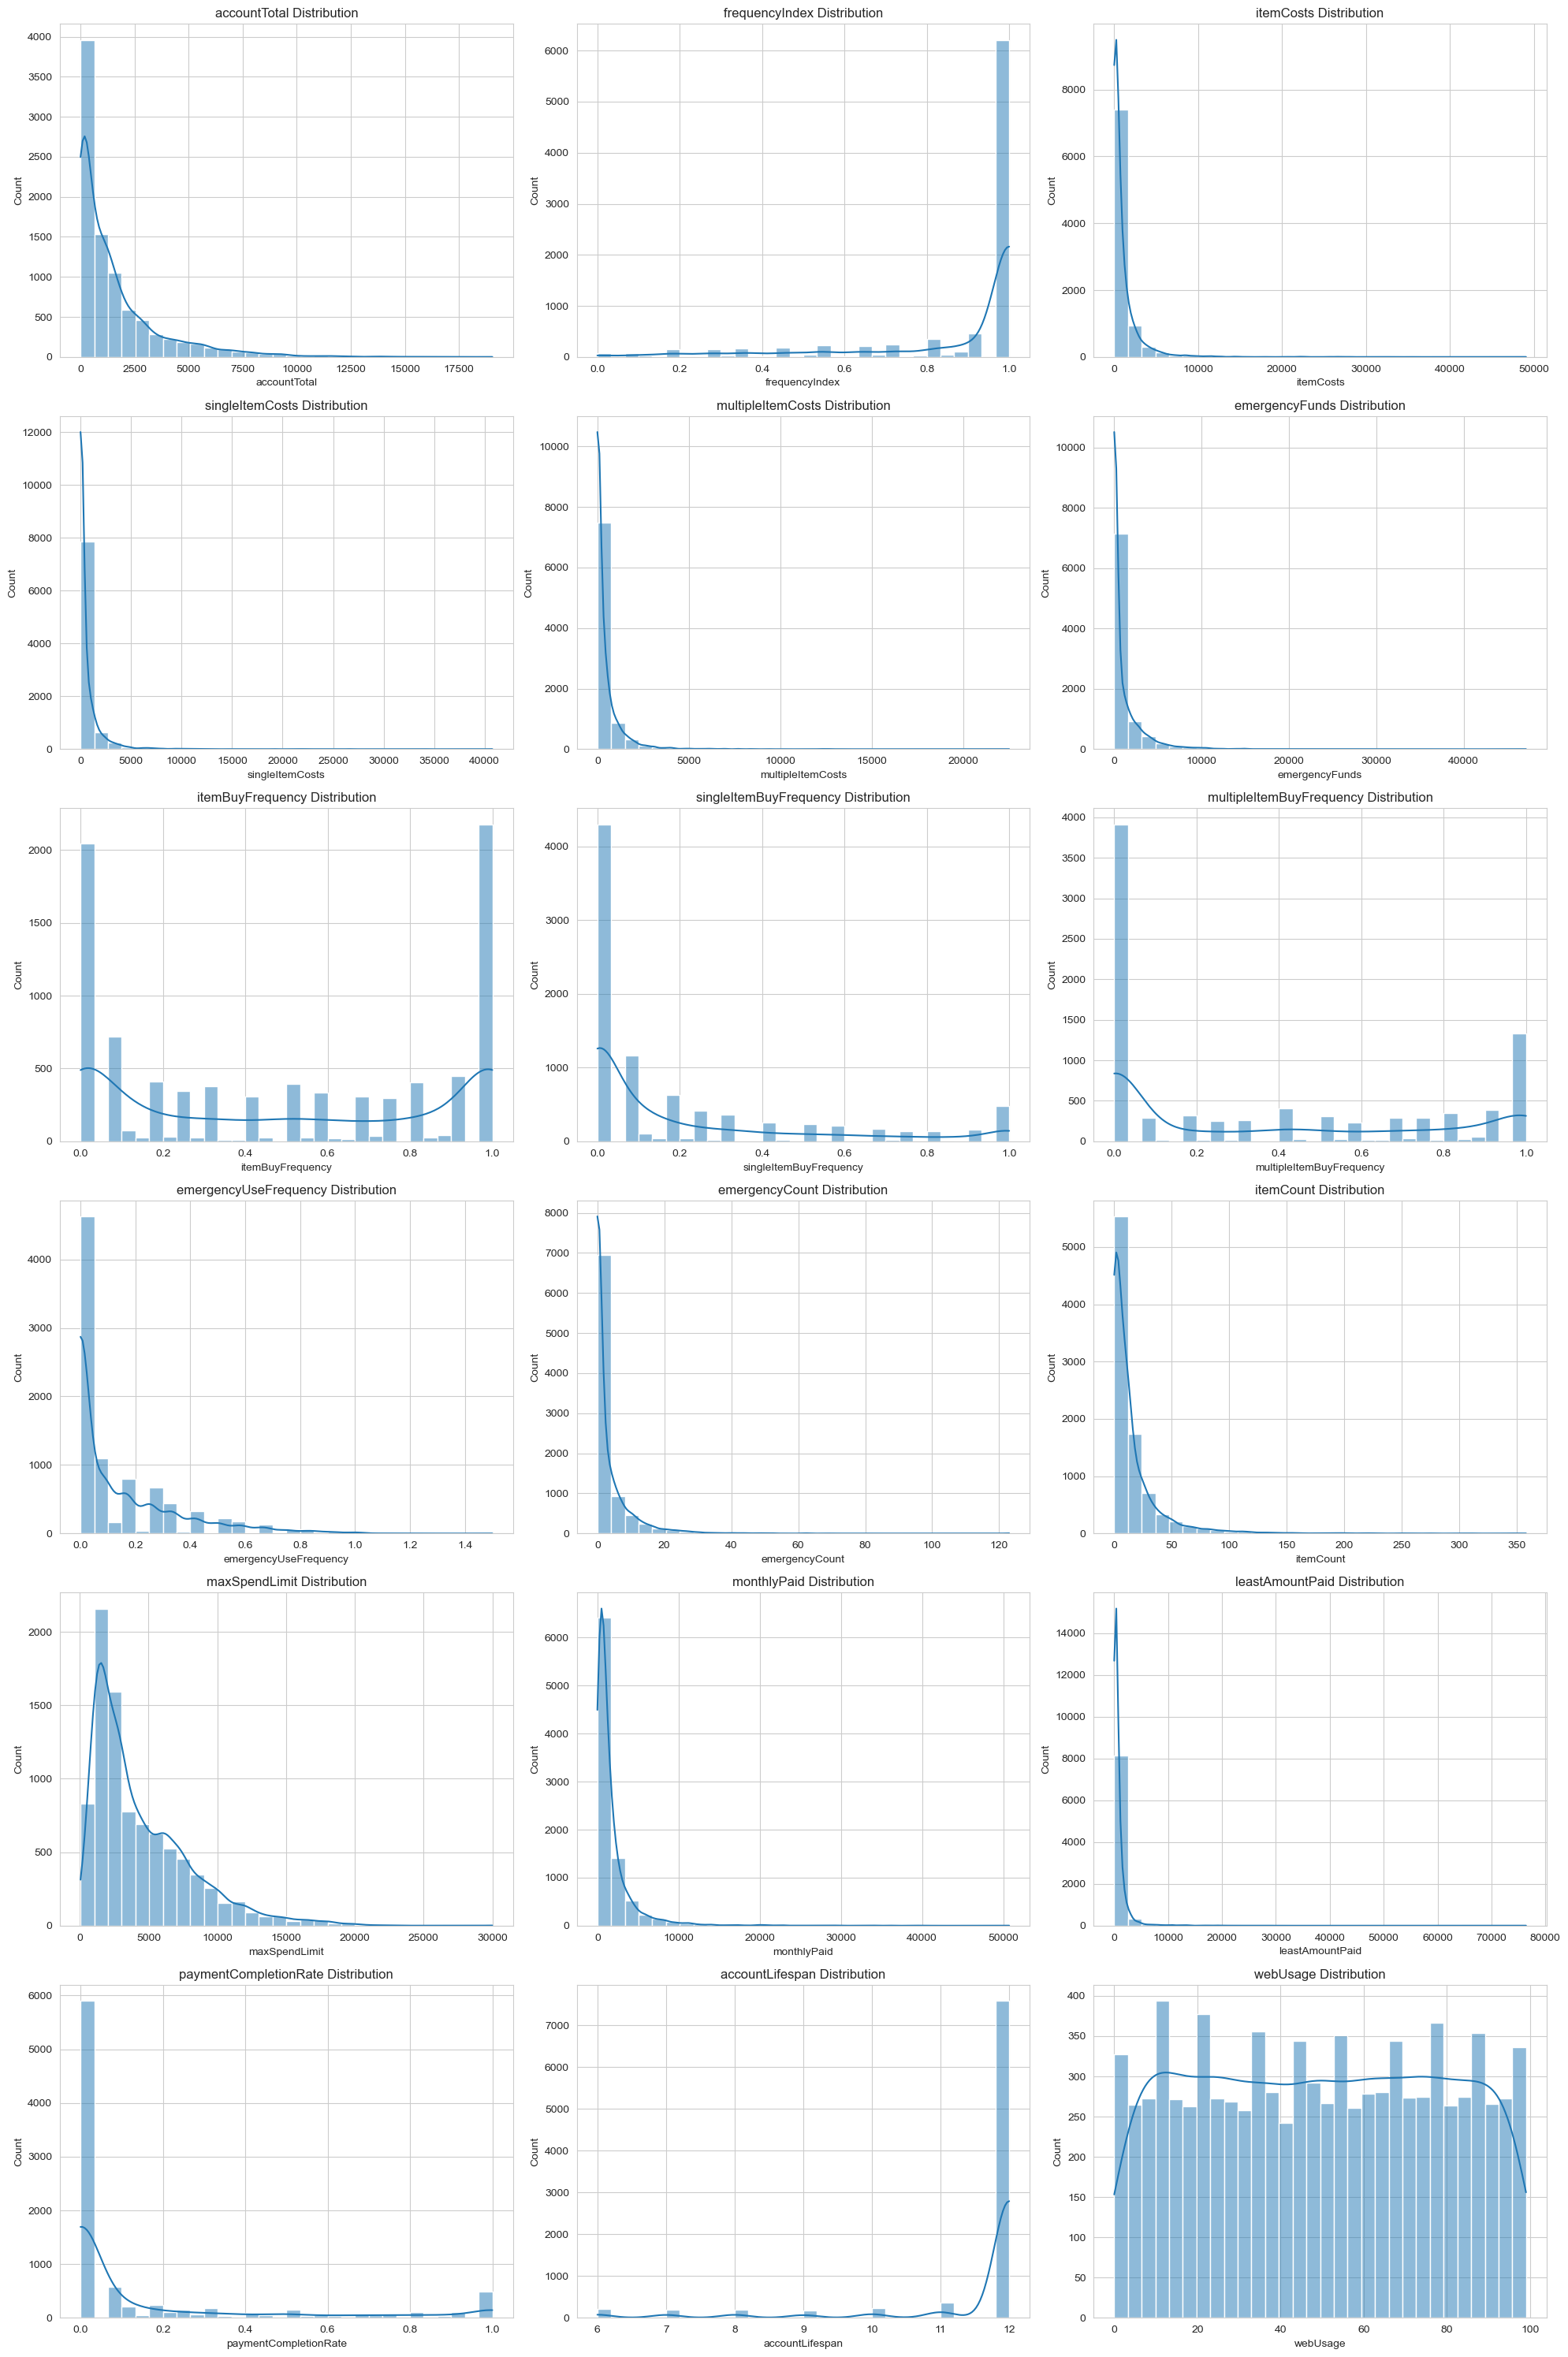

In [21]:
numerical_cols = shopeasy_data.select_dtypes(include=['float64', 'int64']).columns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Ceil division

# Setting up the figure
plt.figure(figsize=(20, n_rows * 5))  # Adjust size as needed

# Loop through the numerical columns and create a subplot for each
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(shopeasy_data[col], kde=True, bins=30)
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()